In [1]:
import sys
sys.path.remove(sys.path[1])

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
filenames = glob.glob("*.jpg")
imageName=[]
vec=[]

In [4]:
file = filenames[1]
file

'2.jpg'

In [5]:
img = cv2.imread(file)
imgCopy = np.copy(img)
imgCopy2 = np.copy(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
features = cv2.goodFeaturesToTrack(gray, 1000, 0.01,10)
h,w = img.shape[0],img.shape[1]
Nstrong = features.shape[0]

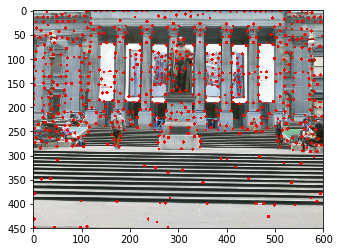

In [6]:
for i in range(Nstrong):
    y,x = int(features[i][0][0]),int(features[i][0][1])
    cv2.circle(img, (y,x), 3, 255, -1)
plt.imshow(img)

In [7]:
r = np.ones((Nstrong,1))*(float('inf'))
print("N strong = "+str(Nstrong))
if(Nstrong>1000):
    Nbest=500
    print(" Setting 500 best points")
elif(Nstrong>600):
    Nbest=300
    print(" Setting 300 best points ")
else:
    Nbest=Nstrong
    print(" Setting Nstrong as the best points ")

N strong = 711
 Setting 300 best points 


Nstrong= 711 and i= 0
Number 10000
Number 20000
Number 20000
Number 20000
Number 20000
Number 20000
Number 20000
Number 20000
Number 20000
Number 20000
Number 30000
Number 30000
Number 40000
Number 50000
Number 50000
Number 50000
Number 60000
Number 60000
Number 70000
Number 80000
Number 90000
Number 100000
Number 110000
Number 120000
Number 130000
Number 130000
Number 130000
Number 130000
Number 130000
Number 130000
Number 130000
Number 140000
Number 150000
Number 160000
Number 170000
Nstrong= 711 and i= 500
Number 180000
Number 180000
Number 180000
Number 180000
Number 180000
Number 180000
Number 180000
Number 190000
Number 200000
Number 200000
Number 200000
Number 210000
Number 220000
Number 230000
Number 240000
Number 250000
Number 250000


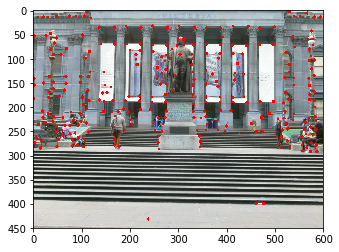

In [8]:
count = 1
for i in range(Nstrong):
    if(i%500==0):
        print('Nstrong= '+str(Nstrong)+' and i= '+ str(i))
    for j in range(0,Nstrong):
        yi,xi = int(features[i][0][0]),int(features[i][0][1])
        yj,xj = int(features[j][0][0]),int(features[j][0][1])
        if(gray[xj,yj] > gray[xi,yi]):
            count+=1
            ed= (xj - xi)**2 + (yj - yi)**2
        else:
            ed= float('inf')
        if(ed<r[i]):
            r[i]=ed
        if count%10000==0:
            print("Number "+str(count))

points=np.zeros((Nstrong,3), dtype='f')

for i in range(Nstrong):
    points[i][0]= r[i][0]
    points[i][1]= features[i][0][1]
    points[i][2]= features[i][0][0]

pointsSorted = points[points[:,0].argsort()[::-1]]
temp=pointsSorted[0:Nbest,1:3]
for i in range(Nbest):
    x, y = points[i][1], points[i][2]
    cv2.circle(imgCopy, (y,x), 3, 255, -1)
    
plt.imshow(imgCopy)

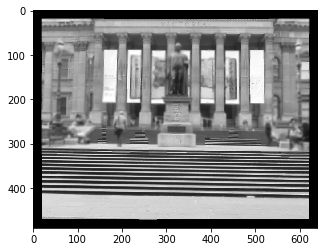

In [9]:
imgVec = []
patch_size = 40
patch_pad = int(patch_size/2)
best_h = points[:Nbest,1] + patch_pad
best_w = points[:Nbest,2] + patch_pad
image_for_patch = np.zeros((h+patch_size, w+patch_size))
image_for_patch[patch_pad:patch_pad+h, patch_pad:patch_pad+w] = gray
for i in range(best_h.shape[0]):
    tempH= int(best_h[i])
    tempW= int(best_w[i])
    tempImg= image_for_patch[tempH-patch_pad:tempH+patch_pad,tempW-patch_pad:tempW+patch_pad]
    tempBlurr= cv2.GaussianBlur(tempImg,(3,3),1.5)
    image_for_patch[tempH-patch_pad:tempH+patch_pad,tempW-patch_pad:tempW+patch_pad]= tempBlurr
    tempScale= cv2.resize(tempBlurr,(8,8))
    tempVec= tempScale.reshape(-1,1)
    fMap= np.array(([tempH, tempW], tempVec))
    imgVec.append(fMap)
# cv2.imwrite('FD'+tempName,image_for_patch)
imgVecArr = np.array(imgVec)
# imgMap= np.array((tempName,imgVecArr))
# vec.append(imgMap)
plt.imshow(image_for_patch,cmap="gray")

In [13]:
vec_1 = imgVec

In [14]:
vec_2 = imgVec

In [18]:
img1_Cord= np.array(vec_1)[:,0]	# [[h1,w1]; [h2,w2],.....]
img1_vec= np.array(vec_1)[:,1]		# [[vec1], [vec2], [vec3],..] where vec1 is array= [[elem1],[elem2],...[elem64]]
img2_Cord= np.array(vec_2)[:,0]
img2_vec= np.array(vec_2)[:,1]

In [19]:
def imageFeatureMatch(Nbest_Img1,Nbest_Img2, thresh):
    img1_Cord= np.array(Nbest_Img1)[:,0]	# [[h1,w1]; [h2,w2],.....]
    img1_vec= np.array(Nbest_Img1)[:,1]		# [[vec1], [vec2], [vec3],..] where vec1 is array= [[elem1],[elem2],...[elem64]]
    img2_Cord= np.array(Nbest_Img2)[:,0]
    img2_vec= np.array(Nbest_Img2)[:,1]
    matchedPairs=[]
    for i in range(len(img1_Cord)):
        currVec_img1 = (img1_vec[i] - np.mean(img1_vec[i]))/np.std(img1_vec[i])
        min1 = float('inf')
        min2 = float('inf')
        matchedIndx=0
        for j in range(len(img2_Cord)):
            currVec_img2 = (img2_vec[j] - np.mean(img2_vec[j]))/np.std(img2_vec[j]) 
            dist = ((currVec_img2 - currVec_img1)**2).sum()
            if(min1>dist):
                min2= min1
                min1= dist
                matchedIndx=j # with i of image1
        print(i,matchedIndx,min1,min2,min1/min2)
        if((min1/min2)<thresh):
            matchedPairs.append(np.array([i,matchedIndx]))
    return matchedPairs

In [20]:
matches = imageFeatureMatch(vec_1, vec_2, 0.8)

(0, 0, 0.0, inf, 0.0)
(1, 1, 0.0, 117.68375458916826, 0.0)
(2, 2, 0.0, 136.29723016958445, 0.0)
(3, 3, 0.0, 10.391186122046301, 0.0)
(4, 4, 0.0, 105.9452594267895, 0.0)
(5, 5, 0.0, 118.80944569842362, 0.0)
(6, 6, 0.0, 4.415234555966072, 0.0)
(7, 7, 0.0, 2.171962872517382, 0.0)
(8, 8, 0.0, 28.05215829306966, 0.0)
(9, 9, 0.0, 1.9554120753506175, 0.0)
(10, 10, 0.0, 65.34318069176274, 0.0)
(11, 11, 0.0, 108.19142021741968, 0.0)
(12, 12, 0.0, 57.30631338987179, 0.0)
(13, 13, 0.0, 54.60887651829599, 0.0)
(14, 14, 0.0, 10.574300823083682, 0.0)
(15, 15, 0.0, 27.008828604220156, 0.0)
(16, 16, 0.0, 4.905832902746, 0.0)
(17, 17, 0.0, 12.08636720962121, 0.0)
(18, 18, 0.0, 6.715554573323894, 0.0)
(19, 19, 0.0, 6.4171379530811326, 0.0)
(20, 20, 0.0, 84.32436596648648, 0.0)
(21, 21, 0.0, 81.97884560583822, 0.0)
(22, 22, 0.0, 95.90901987214531, 0.0)
(23, 23, 0.0, 68.18270476784133, 0.0)
(24, 24, 0.0, 7.4732433546479955, 0.0)
(25, 25, 0.0, 69.9357520175902, 0.0)
(26, 26, 0.0, 68.9858281351793, 0.0)
(27

(217, 217, 0.0, 57.02198232718552, 0.0)
(218, 218, 0.0, 40.40881652359228, 0.0)
(219, 219, 0.0, 33.685953367673164, 0.0)
(220, 220, 0.0, 1.3824702817685162, 0.0)
(221, 221, 0.0, 17.03813539633684, 0.0)
(222, 222, 0.0, 20.679900388678238, 0.0)
(223, 223, 0.0, 68.5676160996162, 0.0)
(224, 224, 0.0, 42.27018278625565, 0.0)
(225, 225, 0.0, 62.17159240480348, 0.0)
(226, 226, 0.0, 45.52587951976634, 0.0)
(227, 227, 0.0, 53.26026193897076, 0.0)
(228, 228, 0.0, 4.270710318032629, 0.0)
(229, 229, 0.0, 24.538931697711774, 0.0)
(230, 230, 0.0, 40.56340429500543, 0.0)
(231, 231, 0.0, 31.321588961088395, 0.0)
(232, 232, 0.0, 1.3998050086114742, 0.0)
(233, 233, 0.0, 53.82856758102637, 0.0)
(234, 234, 0.0, 2.673168416187218, 0.0)
(235, 235, 0.0, 37.57990123906121, 0.0)
(236, 236, 0.0, 63.70480307700616, 0.0)
(237, 237, 0.0, 34.91112006378253, 0.0)
(238, 238, 0.0, 20.823052295467186, 0.0)
(239, 239, 0.0, 0.7474474837859189, 0.0)
(240, 240, 0.0, 18.94554593635967, 0.0)
(241, 241, 0.0, 46.26332636179846

In [21]:
matches

[array([0, 0]),
 array([1, 1]),
 array([2, 2]),
 array([3, 3]),
 array([4, 4]),
 array([5, 5]),
 array([6, 6]),
 array([7, 7]),
 array([8, 8]),
 array([9, 9]),
 array([10, 10]),
 array([11, 11]),
 array([12, 12]),
 array([13, 13]),
 array([14, 14]),
 array([15, 15]),
 array([16, 16]),
 array([17, 17]),
 array([18, 18]),
 array([19, 19]),
 array([20, 20]),
 array([21, 21]),
 array([22, 22]),
 array([23, 23]),
 array([24, 24]),
 array([25, 25]),
 array([26, 26]),
 array([27, 27]),
 array([28, 28]),
 array([29, 29]),
 array([30, 30]),
 array([31, 31]),
 array([32, 32]),
 array([33, 33]),
 array([34, 34]),
 array([35, 35]),
 array([36, 36]),
 array([37, 37]),
 array([38, 38]),
 array([39, 39]),
 array([40, 40]),
 array([41, 41]),
 array([42, 42]),
 array([43, 43]),
 array([44, 44]),
 array([45, 45]),
 array([46, 46]),
 array([47, 47]),
 array([48, 48]),
 array([49, 49]),
 array([50, 50]),
 array([51, 51]),
 array([52, 52]),
 array([53, 53]),
 array([54, 54]),
 array([55, 55]),
 array([56, 

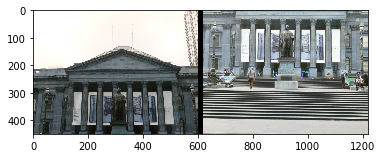

In [22]:
image_1_ = cv2.imread(filenames[0])
image_2_ = cv2.imread(filenames[1])
h1,w1,_ = image_1_.shape
h2,w2,_ = image_2_.shape
pad = 20
new = np.zeros((max(h1,h2),w1+w2+pad,3),dtype='uint8')
new[:h1, :w1,:] = image_1_
new[:h2, w1+pad:,:] = image_2_
plt.imshow(new)

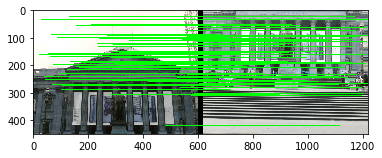

In [25]:
for i in range(len(matches)):
    cv2.line(new,(img1_Cord[matches[i][0]][1], img1_Cord[matches[i][0]][0]), (img2_Cord[matches[i][1]][1]+w1+pad,img2_Cord[matches[i][1]][0]),[0,255,0],1)
#     cv2.line(new, (10,10), (1000,10),[255,0,0],2)
cv2.imwrite("Trial.png",new)
plt.imshow(new)

In [18]:
img1_Cord[0]

[213, 467]

In [19]:
matches[0][1]

0

In [20]:
img2_Cord[0][]

SyntaxError: invalid syntax (<ipython-input-20-f0a0d01edb16>, line 1)

In [ ]:
img1_Cord